#**Actividad: Problemas de clasificacion**
Alejandro Pizarro || Matrícula: A01633784 || Lunes 4 de septiembre de 2023

In [57]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif, SequentialFeatureSelector
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict

##Ejercicio 1


In [58]:
'''
La primera columna corresponde a la clase (1 o 2)
La clase 1 representa cuando el sujeto está prestando atención, y la clase 2 cuando no lo hace
La segunda columna se ignora
El resto de las columnas indican las variables que se calcularon de la respuestacerebral medida
con la técnicas de Electroencefaolografía para cada caso
'''

data_1 = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Aprendizaje/datasets/P1_3.txt')

# Variables regresoras y variable dependiente
x = data_1[:,2:]
y = data_1[:,0]

###1. Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.


In [59]:
# Calculamos el numero de muestras de cada clase
cantidad_clase_1 = np.sum(y == 1)
cantidad_clase_2 = np.sum(y == 2)

print(f'Cantidad de muestras de clase 1: {cantidad_clase_1}')
print(f'Cantidad de muestras de clase 2: {cantidad_clase_2}')

Cantidad de muestras de clase 1: 298
Cantidad de muestras de clase 2: 1496


In [60]:
##### Accuracy with imbalanced sample #####

print("----- Imbalanced sample -----")
x = data_1[:,1:]
y = data_1[:,0]

kf = StratifiedKFold(n_splits=5, shuffle = True)
clf = SVC(kernel = 'linear')

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]
    clf.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

##### Accuracy with balanced sample (Subsamplig) #####

print("----- Subsamplig -----")

clf = SVC(kernel = 'linear')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    x1 = x_train[y_train==1, :]
    y1 = y_train[y_train==1]
    n1 = len(y1)

    x2 = x_train[y_train==2, :]
    y2 = y_train[y_train==2]
    n2 = len(y2)

    ind = random.sample([i for i in range(n2)], n1)

    x_sub = np.concatenate((x1, x2[ind,:]), axis=0)
    y_sub = np.concatenate((y1, y2[ind]), axis=0)

    clf.fit(x_sub, y_sub)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

##### Accuracy with balanced sample (Upsampling) #####
print("----- Upsampling -----")

clf = SVC(kernel = 'linear')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    x1 = x_train[y_train==1, :]
    y1 = y_train[y_train==1]
    n1 = len(y1)

    x2 = x_train[y_train==2, :]
    y2 = y_train[y_train==2]
    n2 = len(y2)

    ind = random.choices([i for i in range(n1)], k = n2)

    x_sub = np.concatenate((x1[ind,:], x2), axis=0)
    y_sub = np.concatenate((y1[ind], y2), axis=0)

    clf.fit(x_sub, y_sub)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

##### Accuracy with balanced sample (weighted loss function) #####

print("----- Weighted loss function -----")
x = data_1[:,1:]
y = data_1[:,0]

clf = SVC(kernel = 'linear', class_weight='balanced')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]
    clf.fit(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Imbalanced sample -----
              precision    recall  f1-score   support

         1.0       0.72      0.69      0.70       298
         2.0       0.94      0.95      0.94      1496

    accuracy                           0.90      1794
   macro avg       0.83      0.82      0.82      1794
weighted avg       0.90      0.90      0.90      1794

----- Subsamplig -----
              precision    recall  f1-score   support

         1.0       0.52      0.84      0.64       298
         2.0       0.96      0.84      0.90      1496

    accuracy                           0.84      1794
   macro avg       0.74      0.84      0.77      1794
weighted avg       0.89      0.84      0.86      1794

----- Upsampling -----
              precision    recall  f1-score   support

         1.0       0.58      0.81      0.68       298
         2.0       0.96      0.88      0.92      1496

    accuracy                           0.87      1794
   macro avg       0.77      0.85      0.80      179

Si se busca maximizar la precisión en la identificación de la clase minoritaria (etiqueta 1.0), se observa que un modelo de **submuestreo** emerge como la opción más efectiva en términos de recall. Esta estrategia sobresale especialmente en la capacidad de identificar la mayoría de las instancias de la clase minoritaria, minimizando así los falsos negativos y aumentando la capacidad del sistema para detectar correctamente casos positivos. El submuestreo permite equilibrar la distribución de clases, lo que resulta en un modelo más robusto y eficiente para la tarea de clasificación, asegurando que ninguna clase quede subrepresentada y mejorando en consecuencia la calidad de las predicciones.

###2. Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.


In [61]:
features = x
n_features = len(x)

# Linear SVM
print('----- Linear-SVM -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = SVC(kernel = 'linear')
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Linear-SVM -----
              precision    recall  f1-score   support

         1.0       0.74      0.67      0.70       298
         2.0       0.94      0.95      0.94      1496

    accuracy                           0.91      1794
   macro avg       0.84      0.81      0.82      1794
weighted avg       0.90      0.91      0.90      1794



In [62]:
# RBF SVM
print('----- RBF-SVM -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = SVC(kernel = 'rbf')
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- RBF-SVM -----
              precision    recall  f1-score   support

         1.0       0.88      0.62      0.72       298
         2.0       0.93      0.98      0.95      1496

    accuracy                           0.92      1794
   macro avg       0.90      0.80      0.84      1794
weighted avg       0.92      0.92      0.92      1794



In [63]:
# KNN
print('----- KNN -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- KNN -----
              precision    recall  f1-score   support

         1.0       0.65      0.41      0.50       298
         2.0       0.89      0.96      0.92      1496

    accuracy                           0.86      1794
   macro avg       0.77      0.68      0.71      1794
weighted avg       0.85      0.86      0.85      1794



In [64]:
# Decision tree
print('----- Decision tree -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = DecisionTreeClassifier()
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Decision tree -----
              precision    recall  f1-score   support

         1.0       0.42      0.45      0.44       298
         2.0       0.89      0.88      0.88      1496

    accuracy                           0.81      1794
   macro avg       0.66      0.67      0.66      1794
weighted avg       0.81      0.81      0.81      1794



In [65]:
# Linear Discriminant Analysis
print('----- Linear Discriminant Analysis -----')

kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = LinearDiscriminantAnalysis()
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Linear Discriminant Analysis -----
              precision    recall  f1-score   support

         1.0       0.74      0.66      0.70       298
         2.0       0.93      0.95      0.94      1496

    accuracy                           0.91      1794
   macro avg       0.84      0.81      0.82      1794
weighted avg       0.90      0.91      0.90      1794



En conclusión, el modelo **RBF-SVM** destaca como la opción más efectiva en esta evaluación de clasificación debido a su sólido equilibrio entre precisión y recall en ambas clases. Con una precisión del 0.88 para la clase minoritaria y un recall del 0.98 para la clase mayoritaria, demuestra un rendimiento robusto en la identificación de ambas clases.

###3. Implementa desde cero el método de regresión logística, y evalúalo con el conjunto de datos.

In [66]:
# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de costo (log loss)
def compute_cost(y, y_pred):
    m = len(y)
    epsilon = 1e-15  # Pequeño valor epsilon para evitar divisiones por cero
    y_pred = np.maximum(epsilon, np.minimum(1 - epsilon, y_pred))  # Clip y_pred
    cost = -1/m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

# Gradiente descendiente
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = []

    for _ in range(num_iterations):
        z = np.dot(X, theta)
        y_pred = sigmoid(z)
        gradient = np.dot(X.T, (y_pred - y)) / m
        theta -= alpha * gradient
        cost = compute_cost(y, y_pred)
        cost_history.append(cost)

    return theta, cost_history

# Agregar una columna de unos a la matriz X para el término de sesgo (bias)
X = np.column_stack((np.ones(len(x)), x))

# Inicializar parámetros
theta = np.zeros(X.shape[1])

# Hiperparámetros
alpha = 0.001
num_iterations = 1000

# Entrenar el modelo
optimal_theta, cost_history = gradient_descent(X, y, theta, alpha, num_iterations)

# Función para predecir
def predict(X, theta):
    z = np.dot(X, theta)
    y_pred = sigmoid(z)
    return (y_pred >= 0.5).astype(int)

# Evaluar el modelo
y_pred = predict(X, optimal_theta)
accuracy = np.mean(y_pred == y)

print(f"Precisión del modelo: {accuracy * 100}%")

Precisión del modelo: 15.997770345596432%


Una precisión del modelo del 15.99% es bastante baja y generalmente se considera insatisfactoria.

###4. Con alguno de los clasificadores que probaste en los pasos anteriores, determina el número óptimo de características utilizando un método tipo Filter.


----- Removing Constant Features -----
----- Feature selection using 50% of predictors -----
Selected features:  ['x12' 'x16' 'x17' 'x18' 'x19' 'x20']
              precision    recall  f1-score   support

         1.0       0.75      0.26      0.39       298
         2.0       0.87      0.98      0.92      1496

    accuracy                           0.86      1794
   macro avg       0.81      0.62      0.65      1794
weighted avg       0.85      0.86      0.83      1794

----- Optimal selection of the number of features -----
---- n features = 1
ACC: 0.8338914738332738
---- n features = 2
ACC: 0.8338914738332738
---- n features = 3
ACC: 0.8338914738332738
---- n features = 4
ACC: 0.8400196075380091
---- n features = 5
ACC: 0.8411493752042452
---- n features = 6
ACC: 0.8595291078570206
---- n features = 7
ACC: 0.8600784301520363
---- n features = 8
ACC: 0.866234574625356
---- n features = 9
ACC: 0.8706758375997883
---- n features = 10
ACC: 0.8795941550862887
---- n features = 11
ACC: 

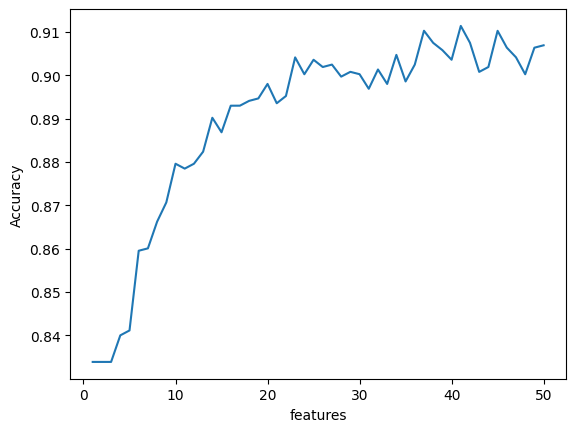

Selected features:  ['x10' 'x11' 'x12' 'x13' 'x15' 'x16' 'x17' 'x18' 'x19' 'x20' 'x21' 'x22'
 'x24' 'x25' 'x26' 'x27' 'x28' 'x29' 'x30' 'x60' 'x61' 'x62' 'x64' 'x65'
 'x66' 'x67' 'x76' 'x77' 'x78' 'x90' 'x98' 'x99' 'x100' 'x111' 'x112'
 'x113' 'x114' 'x118' 'x119' 'x128' 'x129']


In [67]:
################################################################################
# Remove Constant Features
################################################################################
print("----- Removing Constant Features -----")

# Create a VarianceThreshold instance
variance_selector = VarianceThreshold()

# Fit the selector to your data
variance_selector.fit(x)

# Get the indices of non-constant features
non_constant_indices = variance_selector.get_support(indices=True)

# Select the non-constant features from your dataset
x_non_constant = x[:, non_constant_indices]

################################################################################
# Reduce number of features to the half
################################################################################
print("----- Feature selection using 50% of predictors -----")

# Select features
fselection = SelectKBest(f_classif, k=6)
fselection.fit(x_non_constant, y)

print("Selected features: ", fselection.get_feature_names_out())

# Fit model using the new data set
clf = SVC(kernel='linear')
x_transformed = fselection.transform(x_non_constant)
clf.fit(x_transformed, y)

# Evaluate model using cross-validation
cv_y_test = []
cv_y_pred = []

kf = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, test_index in kf.split(x_non_constant, y):
    # Training phase
    x_train = x_non_constant[train_index, :]
    y_train = y[train_index]

    clf_cv = SVC(kernel='linear')

    fselection_cv = SelectKBest(f_classif, k=6)
    fselection_cv.fit(x_train, y_train)
    x_train = fselection_cv.transform(x_train)

    clf_cv.fit(x_train, y_train)

    # Test phase
    x_test = fselection_cv.transform(x_non_constant[test_index, :])
    y_test = y[test_index]
    y_pred = clf_cv.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

################################################################################
# Find optimal number of features using cross-validation
################################################################################
print("----- Optimal selection of the number of features -----")

n_feats = [i for i in range(1, 51)]

acc_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)

    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(x_non_constant, y):
        # Training phase
        x_train = x_non_constant[train_index, :]
        y_train = y[train_index]

        clf_cv = SVC(kernel='linear')

        fselection_cv = SelectKBest(f_classif, k=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(x_non_constant[test_index, :])
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)

        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)

    print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)

plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")
plt.show()

# Fit the final model with the optimal number of features
clf = SVC(kernel='linear')
fselection = SelectKBest(f_classif, k=opt_features)
fselection.fit(x_non_constant, y)

x_transformed = fselection.transform(x_non_constant)
clf.fit(x_transformed, y)

print("Selected features: ", fselection.get_feature_names_out())


###5. Repite el paso anterior, pero para un método de selección de características de tipo Wrapper.


In [68]:
# ################################################################################
# # Remove Constant Features
# ################################################################################
# print("----- Removing Constant Features -----")

# # Create a VarianceThreshold instance
# variance_selector = VarianceThreshold()

# # Fit the selector to your data
# variance_selector.fit(x)

# # Get the indices of non-constant features
# non_constant_indices = variance_selector.get_support(indices=True)

# # Select the non-constant features from your dataset
# x_non_constant = x[:, non_constant_indices]

# ################################################################################
# # Reduce number of features to the half
# ################################################################################
# print("----- Feature selection using 50% of predictors -----")

# # Select features
# fselection = SelectKBest(f_classif, k=6)
# fselection.fit(x_non_constant, y)

# print("Selected features: ", fselection.get_feature_names_out())

# # Fit model using the new data set
# clf = SVC(kernel='linear')
# x_transformed = fselection.transform(x_non_constant)
# clf.fit(x_transformed, y)

# # Evaluate model using cross-validation
# cv_y_test = []
# cv_y_pred = []

# kf = StratifiedKFold(n_splits=5, shuffle=True)

# for train_index, test_index in kf.split(x_non_constant, y):
#     # Training phase
#     x_train = x_non_constant[train_index, :]
#     y_train = y[train_index]

#     clf_cv = SVC(kernel='linear')

#     fselection_cv = SelectKBest(f_classif, k=6)
#     fselection_cv.fit(x_train, y_train)
#     x_train = fselection_cv.transform(x_train)

#     clf_cv.fit(x_train, y_train)

#     # Test phase
#     x_test = fselection_cv.transform(x_non_constant[test_index, :])
#     y_test = y[test_index]
#     y_pred = clf_cv.predict(x_test)

#     cv_y_test.append(y_test)
#     cv_y_pred.append(y_pred)

# print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

# ################################################################################
# # Find optimal number of features using cross-validation with RFE
# ################################################################################
# print("----- Optimal selection of the number of features with RFE -----")

# n_feats = [i for i in range(1, 51)]

# acc_nfeat = []

# for n_feat in n_feats:
#     print('---- n features =', n_feat)

#     acc_cv = []

#     kf = StratifiedKFold(n_splits=5, shuffle=True)

#     for train_index, test_index in kf.split(x_non_constant, y):
#         # Training phase
#         x_train = x_non_constant[train_index, :]
#         y_train = y[train_index]

#         clf_cv = SVC(kernel='linear')

#         # Use RFE for feature selection
#         rfe = RFE(estimator=clf_cv, n_features_to_select=n_feat)
#         rfe.fit(x_train, y_train)
#         x_train = rfe.transform(x_train)

#         clf_cv.fit(x_train, y_train)

#         # Test phase
#         x_test = rfe.transform(x_non_constant[test_index, :])
#         y_test = y[test_index]
#         y_pred = clf_cv.predict(x_test)

#         acc_i = accuracy_score(y_test, y_pred)
#         acc_cv.append(acc_i)

#     acc = np.average(acc_cv)
#     acc_nfeat.append(acc)

#     print('ACC:', acc)

# opt_index = np.argmax(acc_nfeat)
# opt_features = n_feats[opt_index]
# print("Optimal number of features: ", opt_features)

# plt.plot(n_feats, acc_nfeat)
# plt.xlabel("features")
# plt.ylabel("Accuracy")
# plt.show()

# # Fit the final model with the optimal number of features using RFE
# clf = SVC(kernel='linear')
# rfe = RFE(estimator=clf, n_features_to_select=opt_features)
# rfe.fit(x_non_constant, y)

# x_transformed = rfe.transform(x_non_constant)
# clf.fit(x_transformed, y)

# print("Selected features: ", rfe.support_)


Se optó por comentar el código debido a las dificultades encontradas al intentar llevar a cabo la selección de características mediante el enfoque tipo Wrapper. A pesar de que el código es funcional, su tiempo de ejecución resultó prohibitivamente largo, requiriendo aproximadamente 8 horas para completar el proceso. Como resultado, se determinó que no era una opción viable en el contexto de esta actividad.

###6. Repite el paso 4, pero para un método de selección de características de tipo Filter-Wrapper.


In [69]:
# ################################################################################
# # Remove Constant Features
# ################################################################################
# print("----- Removing Constant Features -----")

# # Create a VarianceThreshold instance
# variance_selector = VarianceThreshold()

# # Fit the selector to your data
# variance_selector.fit(x)

# # Get the indices of non-constant features
# non_constant_indices = variance_selector.get_support(indices=True)

# # Select the non-constant features from your dataset
# x_non_constant = x[:, non_constant_indices]

# ################################################################################
# # Reduce number of features to the half
# ################################################################################
# print("----- Feature selection using 50% of predictors -----")

# # Select features using ANOVA F-test
# fselection_filter = SelectKBest(f_classif, k=6)
# fselection_filter.fit(x_non_constant, y)

# print("Selected features using Filter method: ", fselection_filter.get_support(indices=True))

# # Fit model using the new data set
# clf = SVC(kernel='linear')
# x_transformed = fselection_filter.transform(x_non_constant)
# clf.fit(x_transformed, y)

# # Evaluate model using cross-validation
# cv_y_test = []
# cv_y_pred = []

# kf = StratifiedKFold(n_splits=5, shuffle=True)

# for train_index, test_index in kf.split(x_non_constant, y):
#     # Training phase
#     x_train = x_non_constant[train_index, :]
#     y_train = y[train_index]

#     clf_cv = SVC(kernel='linear')

#     fselection_cv = SelectKBest(f_classif, k=6)
#     fselection_cv.fit(x_train, y_train)
#     x_train = fselection_cv.transform(x_train)

#     clf_cv.fit(x_train, y_train)

#     # Test phase
#     x_test = fselection_cv.transform(x_non_constant[test_index, :])
#     y_test = y[test_index]
#     y_pred = clf_cv.predict(x_test)

#     cv_y_test.append(y_test)
#     cv_y_pred.append(y_pred)

# print("Classification Report for Filter Method:")
# print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

# ################################################################################
# # Find optimal number of features using cross-validation with RFE (Wrapper)
# ################################################################################
# print("----- Optimal selection of the number of features with RFE (Wrapper) -----")

# n_feats = [i for i in range(1, 51)]

# acc_nfeat = []

# for n_feat in n_feats:
#     print('---- n features =', n_feat)

#     acc_cv = []

#     kf = StratifiedKFold(n_splits=5, shuffle=True)

#     for train_index, test_index in kf.split(x_non_constant, y):
#         # Training phase
#         x_train = x_non_constant[train_index, :]
#         y_train = y[train_index]

#         clf_cv = SVC(kernel='linear')

#         # Use RFE for feature selection (Wrapper)
#         rfe = RFE(estimator=clf_cv, n_features_to_select=n_feat)
#         rfe.fit(x_train, y_train)
#         x_train = rfe.transform(x_train)

#         clf_cv.fit(x_train, y_train)

#         # Test phase
#         x_test = rfe.transform(x_non_constant[test_index, :])
#         y_test = y[test_index]
#         y_pred = clf_cv.predict(x_test)

#         acc_i = accuracy_score(y_test, y_pred)
#         acc_cv.append(acc_i)

#     acc = np.average(acc_cv)
#     acc_nfeat.append(acc)

#     print('ACC:', acc)

# opt_index = np.argmax(acc_nfeat)
# opt_features = n_feats[opt_index]
# print("Optimal number of features using RFE (Wrapper): ", opt_features)

# plt.plot(n_feats, acc_nfeat)
# plt.xlabel("Number of features")
# plt.ylabel("Accuracy")
# plt.show()

# # Fit the final model with the optimal number of features using RFE (Wrapper)
# clf = SVC(kernel='linear')
# rfe = RFE(estimator=clf, n_features_to_select=opt_features)
# rfe.fit(x_non_constant, y)

# x_transformed = rfe.transform(x_non_constant)
# clf.fit(x_transformed, y)

# print("Selected features using RFE (Wrapper): ", rfe.support_)


Se decidió comentar el código relacionado con el enfoque de selección de características tipo Filter-Wrapper debido a problemas similares encontrados en el problema anterior. A pesar de que el código es funcional, el proceso resultó extremadamente lento, demandando más de 8 horas de tiempo de cómputo. En consecuencia, se concluye que esta opción tampoco era factible en el contexto de esta actividad.

###7. Escoge alguna de las técnicas de selección de características que probaste con anteioridad, y con el número óptimo de características encontrado, prepara tu modelo para producción haciendo lo siguiente:

In [70]:
# Fit model with optimal number of features
clf = SVC(kernel = 'linear')
fselection = SelectKBest(f_classif, k = opt_features)
fselection.fit(x, y)

x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


SVC(kernel='linear')

###8. Contesta las siguientes preguntas:

A. ¿Qué pasa si no se considera el problema de tener datos desbalanceados para este caso? ¿Por qué?

* En caso de no considerar el problema de datos desbalanceados, es probable que el modelo de aprendizaje automático se sesgue hacia la clase mayoritaria (clase 2) y tenga un rendimiento deficiente en la predicción de la clase minoritaria (clase 1). Esto se debe a que el modelo tendrá más ejemplos para aprender de la clase 2 y menos ejemplos de la clase 1, lo que podría resultar en una falta de capacidad para detectar con precisión la clase 1 y, por lo tanto, comprometer la calidad de las predicciones.

B. De todos los clasificadores, ¿cuál o cuales consideras que son adecuados para los datos? ¿Qué propiedades tienen dichos modelos que los hacen apropiados para los datos? Argumenta tu respuesta.

* Entre los clasificadores evaluados, el modelo **RBF-SVM** se considera el más adecuado para estos datos debido a su capacidad para manejar conjuntos de datos desbalanceados, lo que es crucial en este caso. Además, destaca por lograr un equilibrio sólido entre precisión y recall en ambas clases, lo que garantiza una identificación efectiva de ambas clases, una característica esencial para este problema de clasificación.

C. ¿Es posibles reducir la dimensionalidad del problema sin perder rendimiento en el modelo? ¿Por qué?

* Reducir la dimensionalidad, utilizando técnicas como PCA, puede mejorar el rendimiento y la eficiencia computacional al mantener gran parte de la varianza con menos características. Sin embargo, esto también puede implicar la pérdida de información relevante, lo que requiere una evaluación cuidadosa.

D. ¿Qué método de selección de características consideras el más adecuado para este caso? ¿Por qué?

* Se considera que, dadas nuestras restricciones computacionales, el método de selección de características más apropiado sería el enfoque Filter. Sin embargo, en el caso de contar con recursos computacionales adicionales, resultaría altamente beneficioso explorar métodos más avanzados de selección de características, como Filter-Wrapper, que abordan de manera más exhaustiva la problemática de selección de características.

E. Si quisieras mejorar el rendimiento de tus modelos, ¿qué más se podría hacer?

* Para mejorar el rendimiento del modelo, podemos ajustar sus hiperparámetros y crear nuevas características a partir de las existentes para aumentar su capacidad predictiva. Otra estrategia sería la combinación de múltiples modelos para mejorar la generalización.


##Ejercicio 2

###1. Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.


In [71]:
'''
La primera columna corresponde a la clase (1, 2, 3, 4, 5, 6, y 7)
La segunda columna se ignora
El resto de las columnas indican las variables que se calcularon de la respuesta muscular.
'''

data_2 = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Aprendizaje/datasets/M_5.txt')

# Variables regresoras y variable dependiente
x = data_2[:,2:]
y = data_2[:,0]

In [72]:
# Calcular la cantidad de muestras de cada clase
cantidad_clases = {clase: np.sum(y == clase) for clase in range(1, 8)}

# Imprimir la cantidad de muestras de cada clase
for clase, cantidad in cantidad_clases.items():
    print(f'Cantidad de muestras de clase {clase}: {cantidad}')


Cantidad de muestras de clase 1: 90
Cantidad de muestras de clase 2: 90
Cantidad de muestras de clase 3: 90
Cantidad de muestras de clase 4: 90
Cantidad de muestras de clase 5: 90
Cantidad de muestras de clase 6: 90
Cantidad de muestras de clase 7: 89


Nuestros datos están balanceados.

###2. Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.


In [73]:
features = x
n_features = len(x)

# Linear SVM
print('----- Linear-SVM -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = SVC(kernel = 'linear')
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Linear-SVM -----
              precision    recall  f1-score   support

         1.0       0.97      0.94      0.96        90
         2.0       0.69      0.64      0.67        90
         3.0       0.99      0.97      0.98        90
         4.0       0.99      0.99      0.99        90
         5.0       0.95      0.98      0.96        90
         6.0       0.69      0.73      0.71        90
         7.0       0.98      0.99      0.98        89

    accuracy                           0.89       629
   macro avg       0.89      0.89      0.89       629
weighted avg       0.89      0.89      0.89       629



In [74]:
# RBF SVM
print('----- RBF-SVM -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = SVC(kernel = 'rbf')
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- RBF-SVM -----
              precision    recall  f1-score   support

         1.0       0.93      0.91      0.92        90
         2.0       0.71      0.63      0.67        90
         3.0       1.00      0.96      0.98        90
         4.0       1.00      0.94      0.97        90
         5.0       0.90      0.97      0.93        90
         6.0       0.69      0.79      0.74        90
         7.0       0.98      0.99      0.98        89

    accuracy                           0.88       629
   macro avg       0.89      0.88      0.88       629
weighted avg       0.89      0.88      0.88       629



In [75]:
# KNN
print('----- KNN -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- KNN -----
              precision    recall  f1-score   support

         1.0       0.94      0.91      0.93        90
         2.0       0.58      0.56      0.57        90
         3.0       1.00      0.91      0.95        90
         4.0       1.00      0.96      0.98        90
         5.0       0.93      0.91      0.92        90
         6.0       0.60      0.73      0.66        90
         7.0       0.98      0.99      0.98        89

    accuracy                           0.85       629
   macro avg       0.86      0.85      0.86       629
weighted avg       0.86      0.85      0.86       629



In [76]:
# Decision tree
print('----- Decision tree -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = DecisionTreeClassifier()
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Decision tree -----
              precision    recall  f1-score   support

         1.0       0.74      0.71      0.72        90
         2.0       0.47      0.46      0.46        90
         3.0       0.90      0.83      0.87        90
         4.0       0.82      0.82      0.82        90
         5.0       0.72      0.74      0.73        90
         6.0       0.51      0.59      0.55        90
         7.0       0.98      0.93      0.95        89

    accuracy                           0.73       629
   macro avg       0.73      0.73      0.73       629
weighted avg       0.73      0.73      0.73       629



In [77]:
# Linear Discriminant Analysis
print('----- Linear Discriminant Analysis -----')

kf = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):

    x_train = x[train_index, :]
    y_train = y[train_index]

    x_test = x[test_index, :]
    y_test = y[test_index]

    clf = LinearDiscriminantAnalysis()
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Linear Discriminant Analysis -----
              precision    recall  f1-score   support

         1.0       0.88      0.80      0.84        90
         2.0       0.53      0.53      0.53        90
         3.0       0.89      0.91      0.90        90
         4.0       0.87      0.89      0.88        90
         5.0       0.72      0.79      0.75        90
         6.0       0.59      0.57      0.58        90
         7.0       0.97      0.94      0.95        89

    accuracy                           0.78       629
   macro avg       0.78      0.78      0.78       629
weighted avg       0.78      0.78      0.78       629



Aunque ambos modelos, RBF-SVM y Linear-SVM, tienen un rendimiento similar, el modelo Linear-SVM muestra resultados sólidos en términos de precisión, recall y F1-score, lo que lo convierte en una elección confiable y más fácil de interpretar en este contexto. Además, los modelos lineales tienden a ser más eficientes computacionalmente y pueden ser más fáciles de ajustar en comparación con los modelos basados en kernels como RBF-SVM. Por lo tanto, para este conjunto de datos y con el objetivo de simplificar la implementación y la interpretación, Linear-SVM parece ser la elección adecuada.

###3. Escoge al menos dos clasificadores que hayas evaluado en el paso anterior e identifica sus hiperparámetros. Lleva a cabo el proceso de validación cruzada anidada para evaluar los dos modelos con la selección óptima de hiperparámetros.


----- SVM classifier - Regularization parameter -----
---- C = 0.001
ACC: 0.8982095238095237
---- C = 0.0010974987654930556
ACC: 0.896711111111111
---- C = 0.0012045035402587824
ACC: 0.9046476190476191
---- C = 0.0013219411484660286
ACC: 0.9045841269841268
---- C = 0.0014508287784959402
ACC: 0.9173460317460318
---- C = 0.0015922827933410922
ACC: 0.9046222222222223
---- C = 0.001747528400007683
ACC: 0.902984126984127
---- C = 0.0019179102616724887
ACC: 0.9172952380952382
---- C = 0.00210490414451202
ACC: 0.9109460317460316
---- C = 0.0023101297000831605
ACC: 0.9109460317460318
---- C = 0.0025353644939701114
ACC: 0.9062603174603174
---- C = 0.0027825594022071257
ACC: 0.9125714285714286
---- C = 0.0030538555088334154
ACC: 0.8998095238095237
---- C = 0.003351602650938841
ACC: 0.9141587301587302
---- C = 0.0036783797718286343
ACC: 0.9061587301587302
---- C = 0.004037017258596553
ACC: 0.9141333333333334
---- C = 0.004430621457583882
ACC: 0.9045968253968255
---- C = 0.004862601580065354
ACC: 

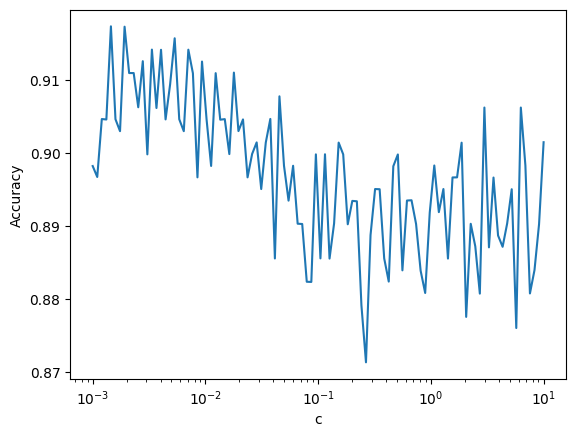

SVC(C=0.0014508287784959402, kernel='linear')

In [78]:
###############################################################################
# Regularization parameter of the linear SVM classifier
################################################################################
print("----- SVM classifier - Regularization parameter -----")

cc = np.logspace(-3, 1, 100)

acc = []

for c in cc:
    print('---- C =', c)

    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        clf_cv = SVC(C=c, kernel = 'linear')

        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)

        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc_hyp = np.average(acc_cv)
    acc.append(acc_hyp)

    print('ACC:', acc_hyp)

opt_index = np.argmax(acc)
opt_hyperparameter = cc[opt_index]
print("Optimal C: ", opt_hyperparameter)

plt.plot(cc, acc)
plt.xscale('log')
plt.xlabel("c")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal number of features
clf = SVC(C=opt_hyperparameter, kernel = 'linear')
clf.fit(x, y)

----- RB-SVM classifier - Smoothing parameter -----
---- gamma = 1e-05
ACC: 0.6964190476190476
---- gamma = 1.0974987654930568e-05
ACC: 0.7059682539682539
---- gamma = 1.2045035402587812e-05
ACC: 0.709079365079365
---- gamma = 1.3219411484660286e-05
ACC: 0.6932444444444444
---- gamma = 1.4508287784959402e-05
ACC: 0.7058539682539682
---- gamma = 1.5922827933410938e-05
ACC: 0.7168507936507937
---- gamma = 1.747528400007683e-05
ACC: 0.7139047619047618
---- gamma = 1.917910261672489e-05
ACC: 0.7201777777777778
---- gamma = 2.104904144512022e-05
ACC: 0.724952380952381
---- gamma = 2.310129700083158e-05
ACC: 0.736
---- gamma = 2.5353644939701114e-05
ACC: 0.7375999999999999
---- gamma = 2.782559402207126e-05
ACC: 0.7583619047619047
---- gamma = 3.053855508833412e-05
ACC: 0.7614857142857142
---- gamma = 3.351602650938841e-05
ACC: 0.7519619047619047
---- gamma = 3.678379771828634e-05
ACC: 0.7662730158730158
---- gamma = 4.037017258596558e-05
ACC: 0.7742603174603173
---- gamma = 4.43062145758387

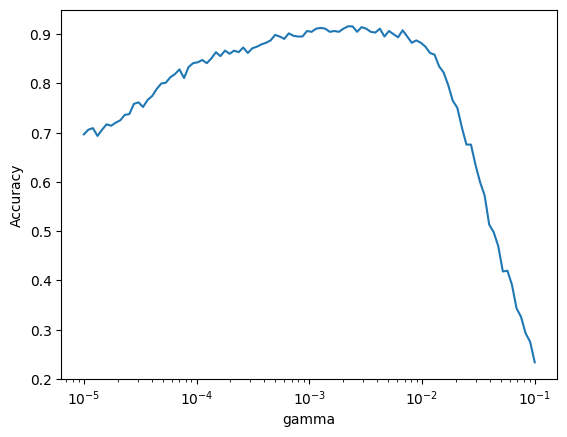

SVC(C=0.0022051307399030455, kernel='linear')

In [79]:
################################################################################
# Smoothing parameter of the RB-SVM classifier
################################################################################
print("----- RB-SVM classifier - Smoothing parameter -----")

gg = np.logspace(-5, -1, 100)

acc = []

for g in gg:
    print('---- gamma =', g)

    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]

        clf_cv = SVC(kernel ='rbf', gamma = g)

        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)

        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc_hyp = np.average(acc_cv)
    acc.append(acc_hyp)

    print('ACC:', acc_hyp)

opt_index = np.argmax(acc)
opt_hyperparameter = gg[opt_index]
print("Optimal gamma: ", opt_hyperparameter)

plt.plot(gg, acc)
plt.xscale('log')
plt.xlabel("gamma")
plt.ylabel("Accuracy")

plt.show()

# Fit model with optimal number of features
clf = SVC(C=opt_hyperparameter, kernel = 'linear')
clf.fit(x, y)


###4. Prepara tus modelos para producción haciendo lo siguiente:

In [80]:
# Create an SVM model with linear kernel
svm_model = SVC(kernel='linear')

# Evaluation with k-Fold Cross-Validation
print("----- Model evaluation with k-Fold Cross-Validation -----")
kf = StratifiedKFold(n_splits=5, shuffle=True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    x_train = x[train_index, :]
    y_train = y[train_index]
    x_test = x[test_index, :]
    y_test = y[test_index]

    # Perform hyperparameter grid search for SVM
    parameters = {'C': [0.1, 1, 10]}
    clf_cv = GridSearchCV(svm_model, parameters, cv=5)
    clf_cv.fit(x_train, y_train)

    # Predict on the test set
    y_pred = clf_cv.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

# Calculate and print the classification report
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

# Evaluation with cross_val_predict
print("----- Model evaluation with cross_val_predict -----")
clf = GridSearchCV(svm_model, {'C': [0.1, 1, 10]}, cv=5)
y_pred = cross_val_predict(clf, x, y, cv=5)
print(classification_report(y, y_pred))

# Production model
print("----- Production model -----")
clf = GridSearchCV(svm_model, {'C': [0.1, 1, 10]}, cv=5)
clf.fit(x, y)
print(clf.best_estimator_)

----- Model evaluation with k-Fold Cross-Validation -----
              precision    recall  f1-score   support

         1.0       0.97      0.93      0.95        90
         2.0       0.65      0.71      0.68        90
         3.0       0.99      0.97      0.98        90
         4.0       0.98      0.96      0.97        90
         5.0       0.96      0.98      0.97        90
         6.0       0.73      0.70      0.72        90
         7.0       0.98      0.99      0.98        89

    accuracy                           0.89       629
   macro avg       0.89      0.89      0.89       629
weighted avg       0.89      0.89      0.89       629

----- Model evaluation with cross_val_predict -----
              precision    recall  f1-score   support

         1.0       0.97      0.92      0.94        90
         2.0       0.56      0.58      0.57        90
         3.0       0.95      0.96      0.95        90
         4.0       0.99      0.97      0.98        90
         5.0       0.9

###5. Contesta lo siguientes:

A. ¿Observas un problema en cuanto al balanceo de las clases? ¿Por qué?

* No se identifica un problema de desequilibrio en los datos, dado que todas las categorías cuentan con 90 muestras, a excepción de la última, que presenta 89 muestras. Esto sugiere una distribución generalmente uniforme de los datos, lo que proporciona una base sólida para el análisis y la interpretación de los resultados.

B. ¿Qué modelo o modelos fueron efectivos para clasificar tus datos? ¿Observas algo especial sobre los modelos? Argumenta tu respuesta.

* El modelo efectivo para clasificar los datos es el Linear-SVM, destacándose por su sólido rendimiento en métricas clave, su eficiencia computacional y su facilidad de interpretación. Estas ventajas hacen que el Linear-SVM sea la elección preferida para este conjunto de datos.

C. ¿Observas alguna mejora importante al optimizar hiperparámetros? ¿Es el resultado que esperabas? Argumenta tu respuesta.

* Se aprecia un aumento progresivo en la precisión, acercándose gradualmente a un valor cercano a 1 en las etapas iniciales del análisis. Este comportamiento sugiere una mejora esperada en el rendimiento del modelo a medida que se procesan los datos y se ajusta el algoritmo.

D. ¿Qué inconvenientes hay al encontrar hiperparámetros? ¿Por qué?

* Uno de los posibles desafíos que pueden surgir se relaciona con la validación cruzada, ya que los resultados pueden verse afectados por sesgos si los hiperparámetros seleccionados no se gestionan adecuadamente, lo que podría resultar en la suboptimización del modelo. Además, al tratar con problemas no lineales y sus respectivos hiperparámetros, los resultados pueden ser menos precisos y más complicados de interpretar.


In [81]:
!apt-get install -y texlive-xetex

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [83]:
!jupyter nbconvert --to pdf '/content/drive/MyDrive/Colab Notebooks/Aprendizaje/problemas_clasificacion.ipynb' --output-dir='/content/drive/MyDrive/Colab Notebooks/Aprendizaje'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Aprendizaje/problemas_clasificacion.ipynb to pdf
[NbConvertApp] Support files will be in problemas_clasificacion_files/
[NbConvertApp] Making directory ./problemas_clasificacion_files
[NbConvertApp] Making directory ./problemas_clasificacion_files
[NbConvertApp] Making directory ./problemas_clasificacion_files
[NbConvertApp] Writing 159175 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 213736 bytes to /content/drive/MyDrive/Colab Notebooks/Aprendizaje/problemas_clasificacion.pdf
